**Simpson's rulefor numerical integration:**
$$
\begin{align}
  \int_a^b f(x)\, dx
  &\approx \frac{1}{3} h\sum_{i = 1}^{n/2}\big[f(x_{2i - 2}) + 4f(x_{2i - 1}) + f(x_{2i})\big]\\
  &= \frac{1}{3} h\big[f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + 2f(x_4) + \ldots + 2f(x_{n - 2}) + 4f(x_{n - 1}) + f(x_n)\big]\\
  &= \frac{1}{3} h\bigg[f(x_0) + 4\sum_{i = 1}^{n/2} f(x_{2i - 1}) + 2\sum_{i = 1}^{n/2 - 1} f(x_{2i}) + f(x_n)\bigg].
\end{align}
$$
We can implement this with:

In [1]:
import numpy as np


def Simp(f,a,b,n):
    if n % 2 == 0: n += 1  # n needs to be odd.
    h = (b-a)/(n-1)

    x = np.linspace(a,b,n) 
    y = f(x)
    return (h/3)*(2*sum(y[::2])-y[0]-y[-1] + 4*sum(y[1::2]))


We can check this with...

In [4]:
def my_sin(x):
    return np.sin(x)

print(Simp(my_sin,0,3.14159,11))

2.0000526241591357


The exact answer is:
$$
\int_0^\pi \sin(x)\,dx=\left.-\cos(x)\right|_{0}^{\pi}=-\cos(\pi)+\cos(0)=1+1=2
$$
    

We use this to compute the Gamma function
$$
\Gamma(z) = \int_0^\infty t^{z-1} e^{-t}\, dt
$$
We can restrict to where the real part of $z$ is between 1 and 2, i.e., $1<\Re(z)<2$. This is due to the periodicity of the function:
$$
\begin{align}
   \Gamma(z+1) & = z\int_0^\infty t^{z-1} e^{-t}\, dt \\
 &= z\Gamma(z).
\end{align}
$$
Let's first concentrate on the value of the gamma function for real arguments. We experiment with how far out we integrate (can't integrate to infinity and beyond!) as well as the number of steps.

In [15]:
z = 2
def integrand(t):
    return t**(z-1)*np.exp(-t)

a = 0
b = 5
n = 9
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)


a = 0
b = 8
n = 9
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)


a = 0
b = 5
n = 21
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)

a = 0
b = 8
n = 21
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)

a = 0
b = 12
n = 21
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)

a = 0
b = 12
n = 49
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)

a = 0
b = 15
n = 21
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)


a = 0
b = 15
n = 31
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)

a = 0
b = 20
n = 51
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)

a = 0
b = 20
n = 81
Gamma2 = Simp(integrand,a,b,n)
print("a = ", a, "b = ",b,", n_steps = ", n, "Gamma(2) = ", Gamma2)


a =  0 b =  5 , n_steps =  9 Gamma(2) =  0.9585758072929125
a =  0 b =  8 , n_steps =  9 Gamma(2) =  0.9909421990236164
a =  0 b =  5 , n_steps =  21 Gamma(2) =  0.9595281035332567
a =  0 b =  8 , n_steps =  21 Gamma(2) =  0.9966967555790628
a =  0 b =  12 , n_steps =  21 Gamma(2) =  0.9985282146549699
a =  0 b =  12 , n_steps =  49 Gamma(2) =  0.9998654548691872
a =  0 b =  15 , n_steps =  21 Gamma(2) =  0.9967041037096536
a =  0 b =  15 , n_steps =  31 Gamma(2) =  0.9992244211606454
a =  0 b =  20 , n_steps =  51 Gamma(2) =  0.9996457167081246
a =  0 b =  20 , n_steps =  81 Gamma(2) =  0.9999416656823318


For $z=2$ the integrand is $te^{-t}$. Let's look at the integrand for various $t$:

In [16]:
for t in [4,6,8,10,12,20]:
    print("t = ", t," the integrand is ", t*np.exp(-t))

t =  4  the integrand is  0.07326255555493671
t =  6  the integrand is  0.014872513059998151
t =  8  the integrand is  0.002683701023220095
t =  10  the integrand is  0.00045399929762484856
t =  12  the integrand is  7.373054823993851e-05
t =  20  the integrand is  4.122307244877116e-08


It seems that $b=15$ and the number of steps equal to 31 is more than adequate. 

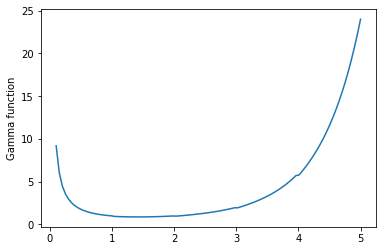

In [25]:

def integrand(t,z):
    return t**(z-1)*np.exp(-t)



def Gamma(z):
    if z.real > 2: 
        return (z-1)*Gamma(z-1)
    elif z.real < 1:
        return Gamma(z+1)/z
    else:
        a=0;b=15;n=101
        h = (b-a)/(n-1)
        t = np.linspace(a,b,n) 
        y = integrand(t,z)
        return (h/3)*(2*sum(y[::2])-y[0]-y[-1] + 4*sum(y[1::2]))

    
z = np.linspace(.1,5,100)
y = []
for x in z:
    y.append(Gamma(x))

    

import matplotlib.pyplot as plt
plt.plot(z,y)
plt.ylabel('Gamma function')
plt.show()

